# DETECCIÓN DE FRAUDE FELIPE

### FASE 1:
Comenzamos el ejercicio definiendo un objetivo, en este caso, nuestro objetivo es predecir si un cliente es fraude o no.

### FASE 2:

Recopilación y preparación de datos

En este caso, como hay muchas columnas estaría bien dedicar un tiempo a conocer y entender cada una de estas. Adjunto una tabla en la que hago una breve descripción de cada una de las variables.

<img src="../docs/capturatabla.png">

In [1]:
#Comenzamos importando las librerías necesarias
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn import neighbors
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargamos el conjunto de datos
filename = "../data/Base.csv"
data = pd.read_csv(filename)

In [3]:
#Para ver si el conjunto de datos se ha cargado bien ponemos por pantalla las primeras 10 filas
data.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,...,0,200.0,0,INTERNET,6.987316,linux,1,1,0,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,...,0,200.0,0,INTERNET,28.199923,x11,1,1,0,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,...,1,200.0,0,INTERNET,11.234264,other,1,1,0,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,AB,1781,...,0,200.0,0,INTERNET,5.329387,other,1,1,0,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,...,0,1500.0,0,INTERNET,4.103970,other,1,1,0,0


In [4]:
#Veamos un breve resumen de la información del conjunto de datos
data.info()
#Así podemos ver que todas las columnas están completas y también podemos ver el tipo de varibale de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [9]:
#Comprobamos si hay algún valor nulo en cada columna
data.isnull().sum()
#Comprobamos que no hay ninguno

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [10]:
#Comprobamos si hay alguún dato duplicado
print("Datos duplicados:",data.duplicated().sum())

Datos duplicados: 0


In [11]:
#Y ahora veamos una breve descripción numérica de los datos
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [12]:
#En el describe anterior parece que la columnas "device_fraud_count" tiene todos los valores nulos. Comprobemoslo:
data['device_fraud_count'].value_counts()

device_fraud_count
0    1000000
Name: count, dtype: int64

In [5]:
#Podemos ver que sí y por lo tanto eliminamos la columna completa porque no es necesario para entrenar el modelo
data = data.drop(['device_fraud_count'],axis=1)
data.shape

(1000000, 31)

In [14]:
#Veamos cuantos de nuestros datos son fraudes y cuantos no
n_fraude = pd.DataFrame(data['fraud_bool'].value_counts())
n_fraude

,count
fraud_bool,
0,988971
1,11029


Hay un claro desbalance enrte nuestros datos y tendremos que tenerlo en cuenta para cuanto lo entrenemos más adelante

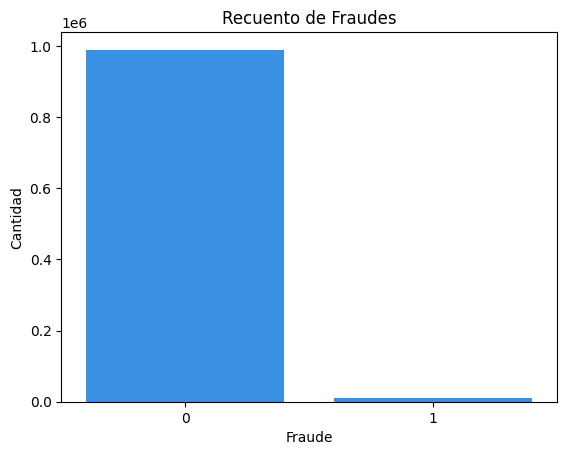

In [6]:
#Por último veamos gráficamente cómo es el desbalance de nuestros datos
Y = data['fraud_bool']
sns.countplot(x=Y,color='dodgerblue')

# Personalizar el gráfico (opcional)
plt.title("Recuento de Fraudes")
plt.xlabel("Fraude")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()

### FASE 3: Visualización de datos
En esta fase vamos a ver como se distribuyen cada una de las variables.

Comenzamos haciendo un histograma para cada una de las columnas que no son categóricas.
    
Para ello definiremos una función y la utilizaremos para dibujar cada histograma en cada una de las celdas de la matriz.

In [18]:
def hist_plot(df):

    categorical_columns = df.select_dtypes(include=['object']).columns
    num_columns = len(df.columns)
    # Divide el número de columnas por 2 para mostrar en 2 filas
    num_cols = 3
    num_rows = (num_columns // num_cols)-1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 30))
    j = 0
    for i, column in enumerate(df.columns):
        l = i-j
        if df[column].dtype != 'object':  # Verifica si la columna no es de tipo 'object'
            row, col = divmod(l, num_cols)
            sns.histplot(df[column], ax=axes[row, col],color='steelblue')
        else:
            j = j+1
    plt.tight_layout()
    plt.show()

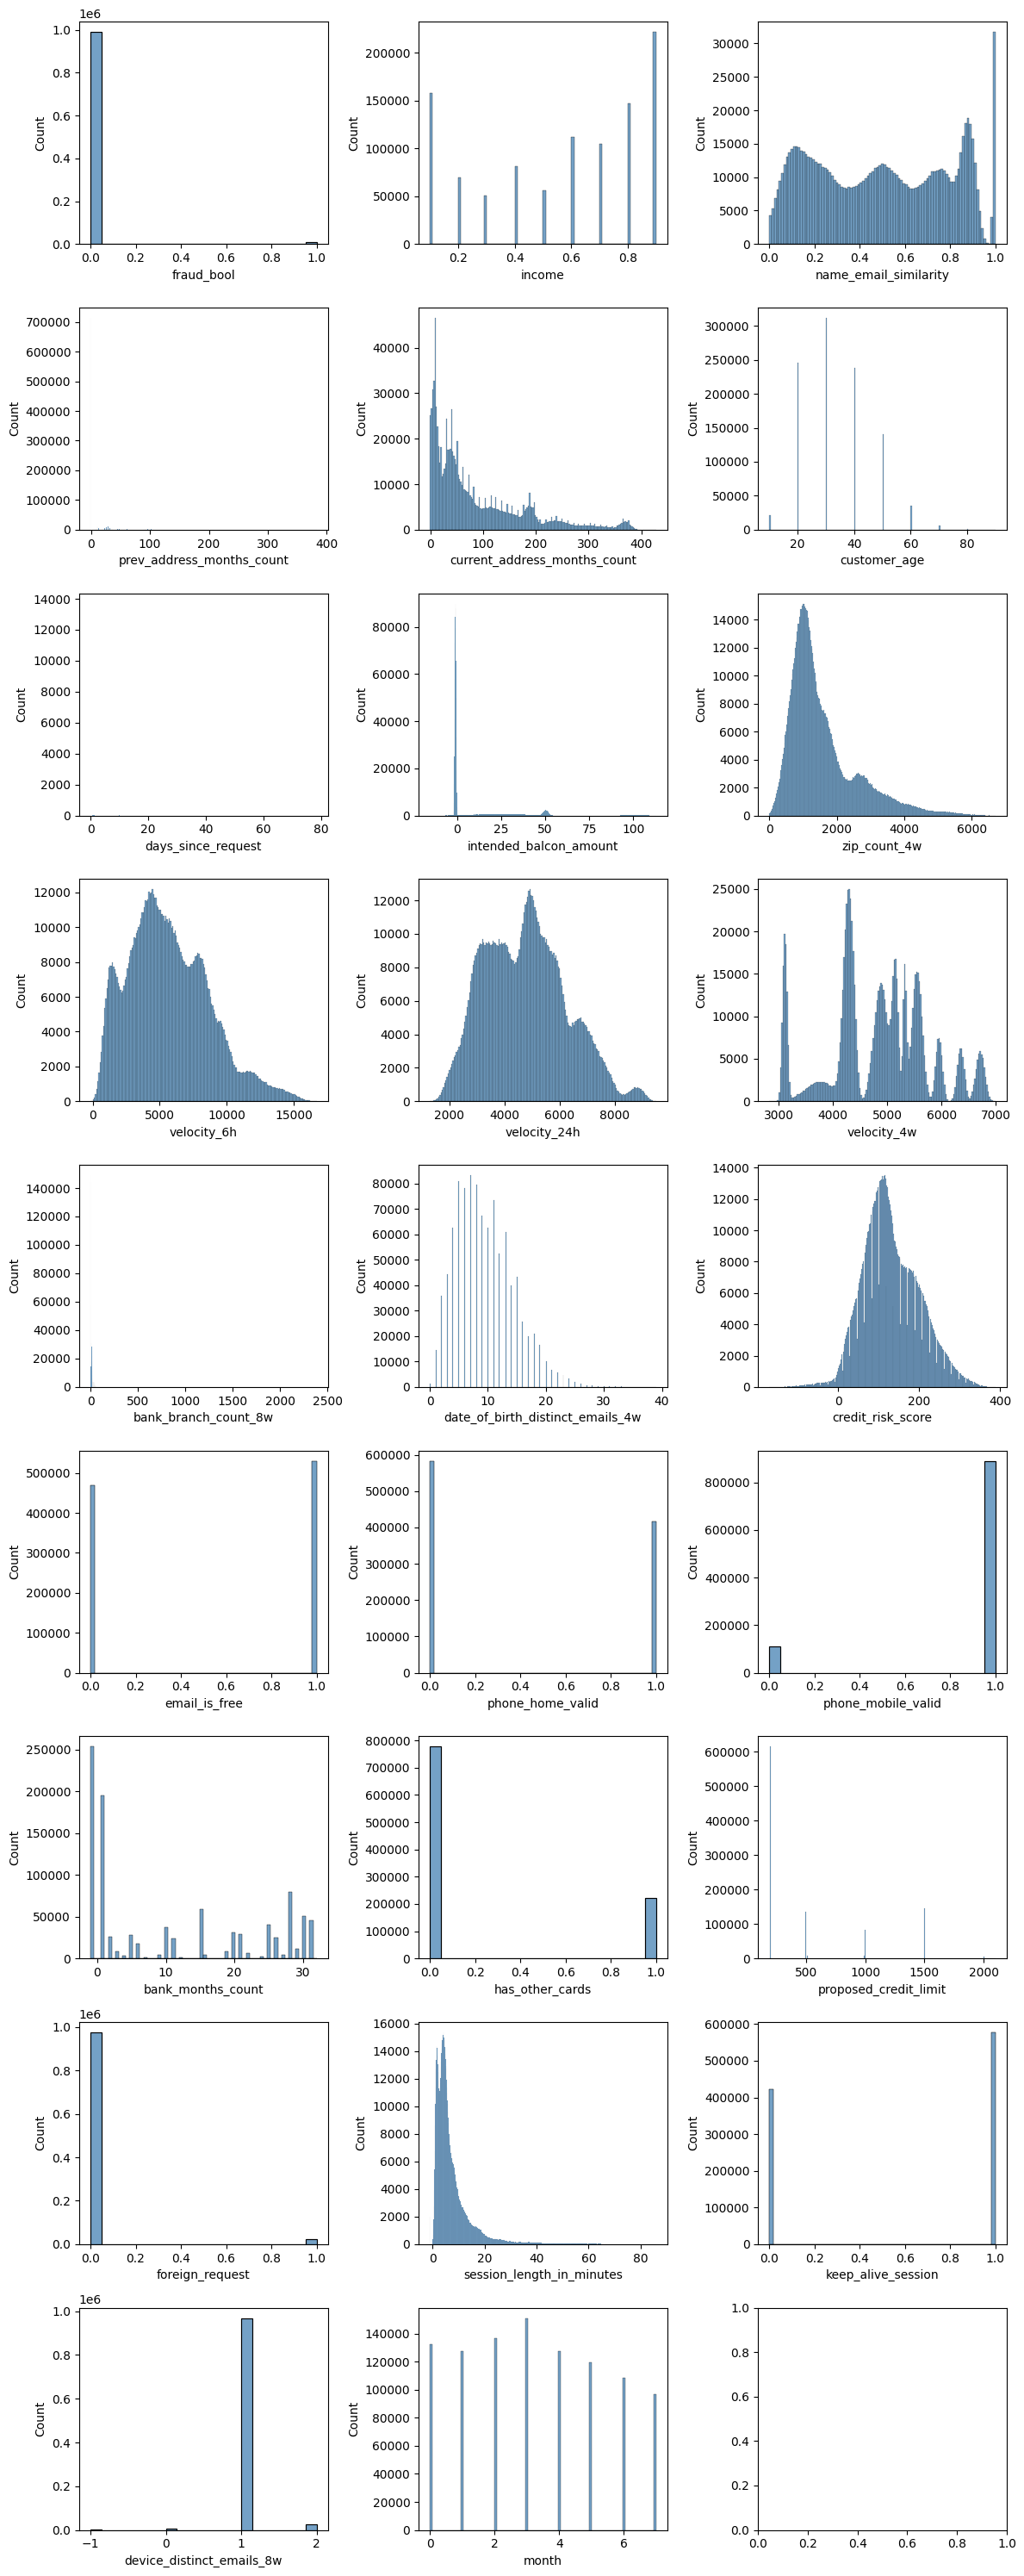

In [19]:
hist_plot(data)

In [32]:
def hist_plot(df,lista):

    num_columns = len(lista)
    # Divide el número de columnas por 2 para mostrar en 2 filas
    # n = number of chart columns
    num_cols = 3
    num_rows = (num_columns-1) // num_cols + 1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
    j = 0

    for i, column in enumerate(df.columns):
        #row, col = divmod(i, num_cols)#i // num_cols, i % num_cols
        for h in range(num_columns):
            if df.columns[i] == lista[h]:  # Verifica si la columna no es de tipo 'object'
                row, col = divmod(j, num_cols)
                sns.histplot(df[column], ax=axes[row, col],kde=False,color='steelblue')
                j=j+1
    plt.tight_layout()
    plt.show()

In [33]:
Lista=['name_email_similarity', 'current_address_months_count', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'credit_risk_score','session_length_in_minutes']

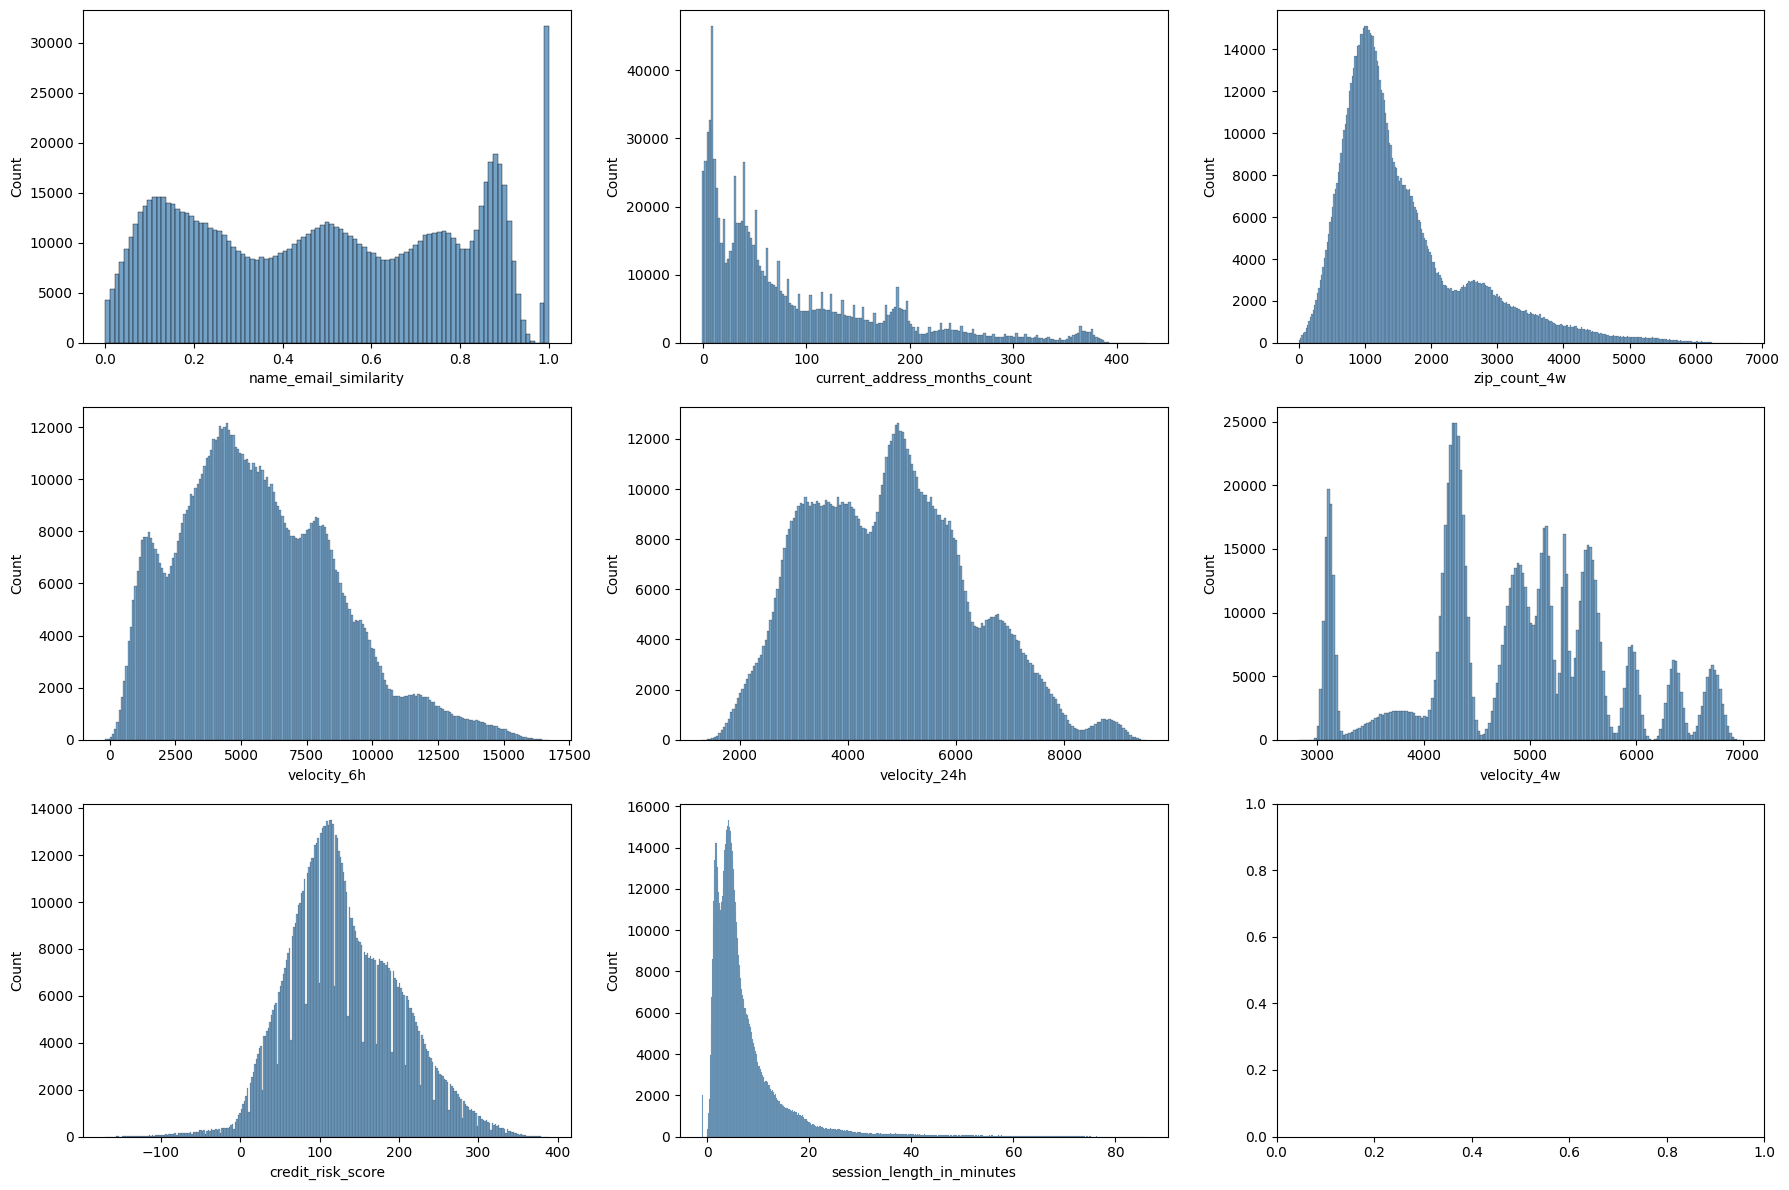

In [34]:
hist_plot(data,Lista)

In [36]:
def kde_plot(df,lista):

    num_columns = len(lista)
    # Divide el número de columnas por 2 para mostrar en 2 filas
    # n = number of chart columns
    num_cols = 3
    num_rows = (num_columns-1) // num_cols + 1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
    j = 0

    for i, column in enumerate(df.columns):
        #row, col = divmod(i, num_cols)#i // num_cols, i % num_cols
        for h in range(num_columns):
            if df.columns[i] == lista[h]:  # Verifica si la columna no es de tipo 'object'
                row, col = divmod(j, num_cols)
                sns.kdeplot(df[column], ax=axes[row, col],color='red')
                j=j+1
    plt.tight_layout()
    plt.show()

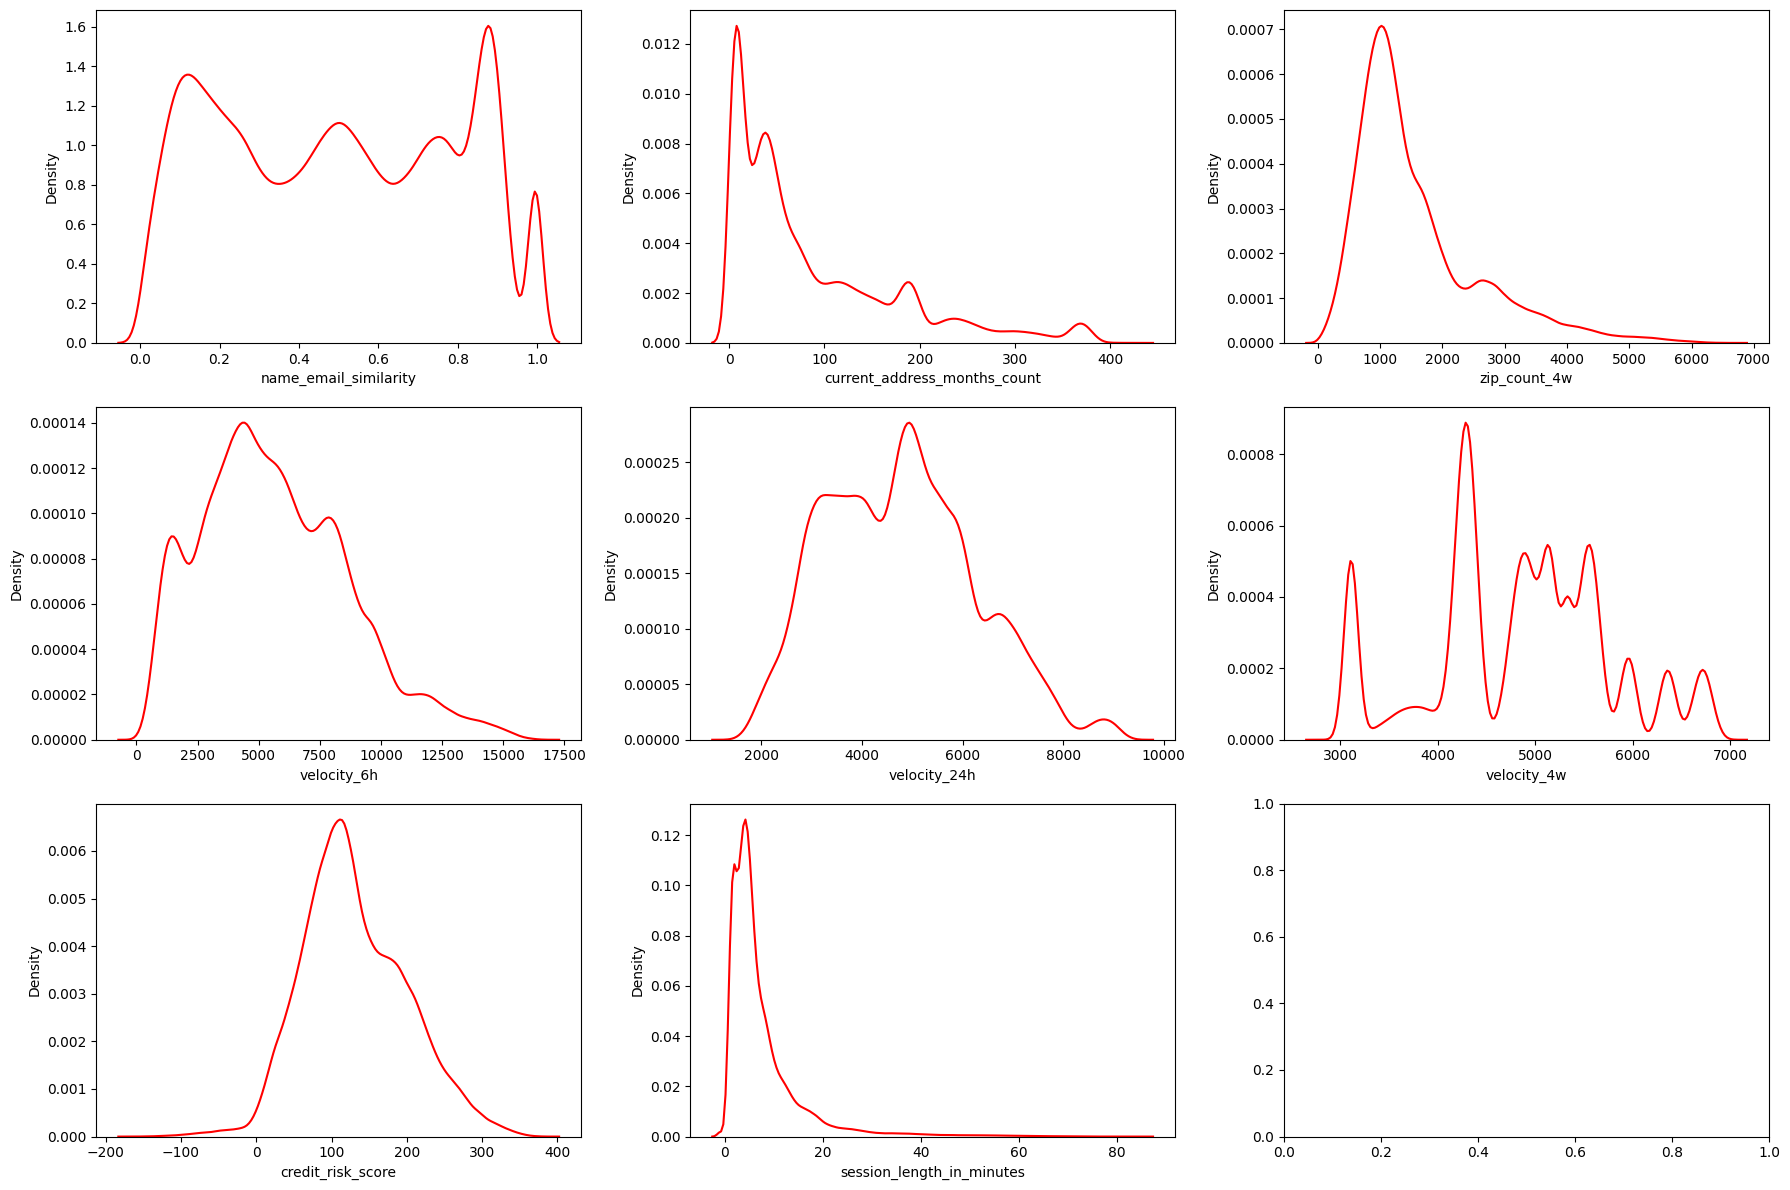

In [37]:
kde_plot(data, Lista)

In [44]:
def box_plot(df):

    categorical_columns = df.select_dtypes(include=['object']).columns
    num_columns = len(df.columns)
    # Divide el número de columnas por 2 para mostrar en 2 filas
    num_cols = 3
    num_rows = (num_columns // num_cols)-1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 30))
    j = 0
    for i, column in enumerate(df.columns):
        l = i-j
        if df[column].dtype != 'object':  # Verifica si la columna no es de tipo 'object'
            row, col = divmod(l, num_cols)
            sns.boxplot(df[column], ax=axes[row, col],color='steelblue')
        else:
            j = j+1
    plt.tight_layout()
    plt.show()

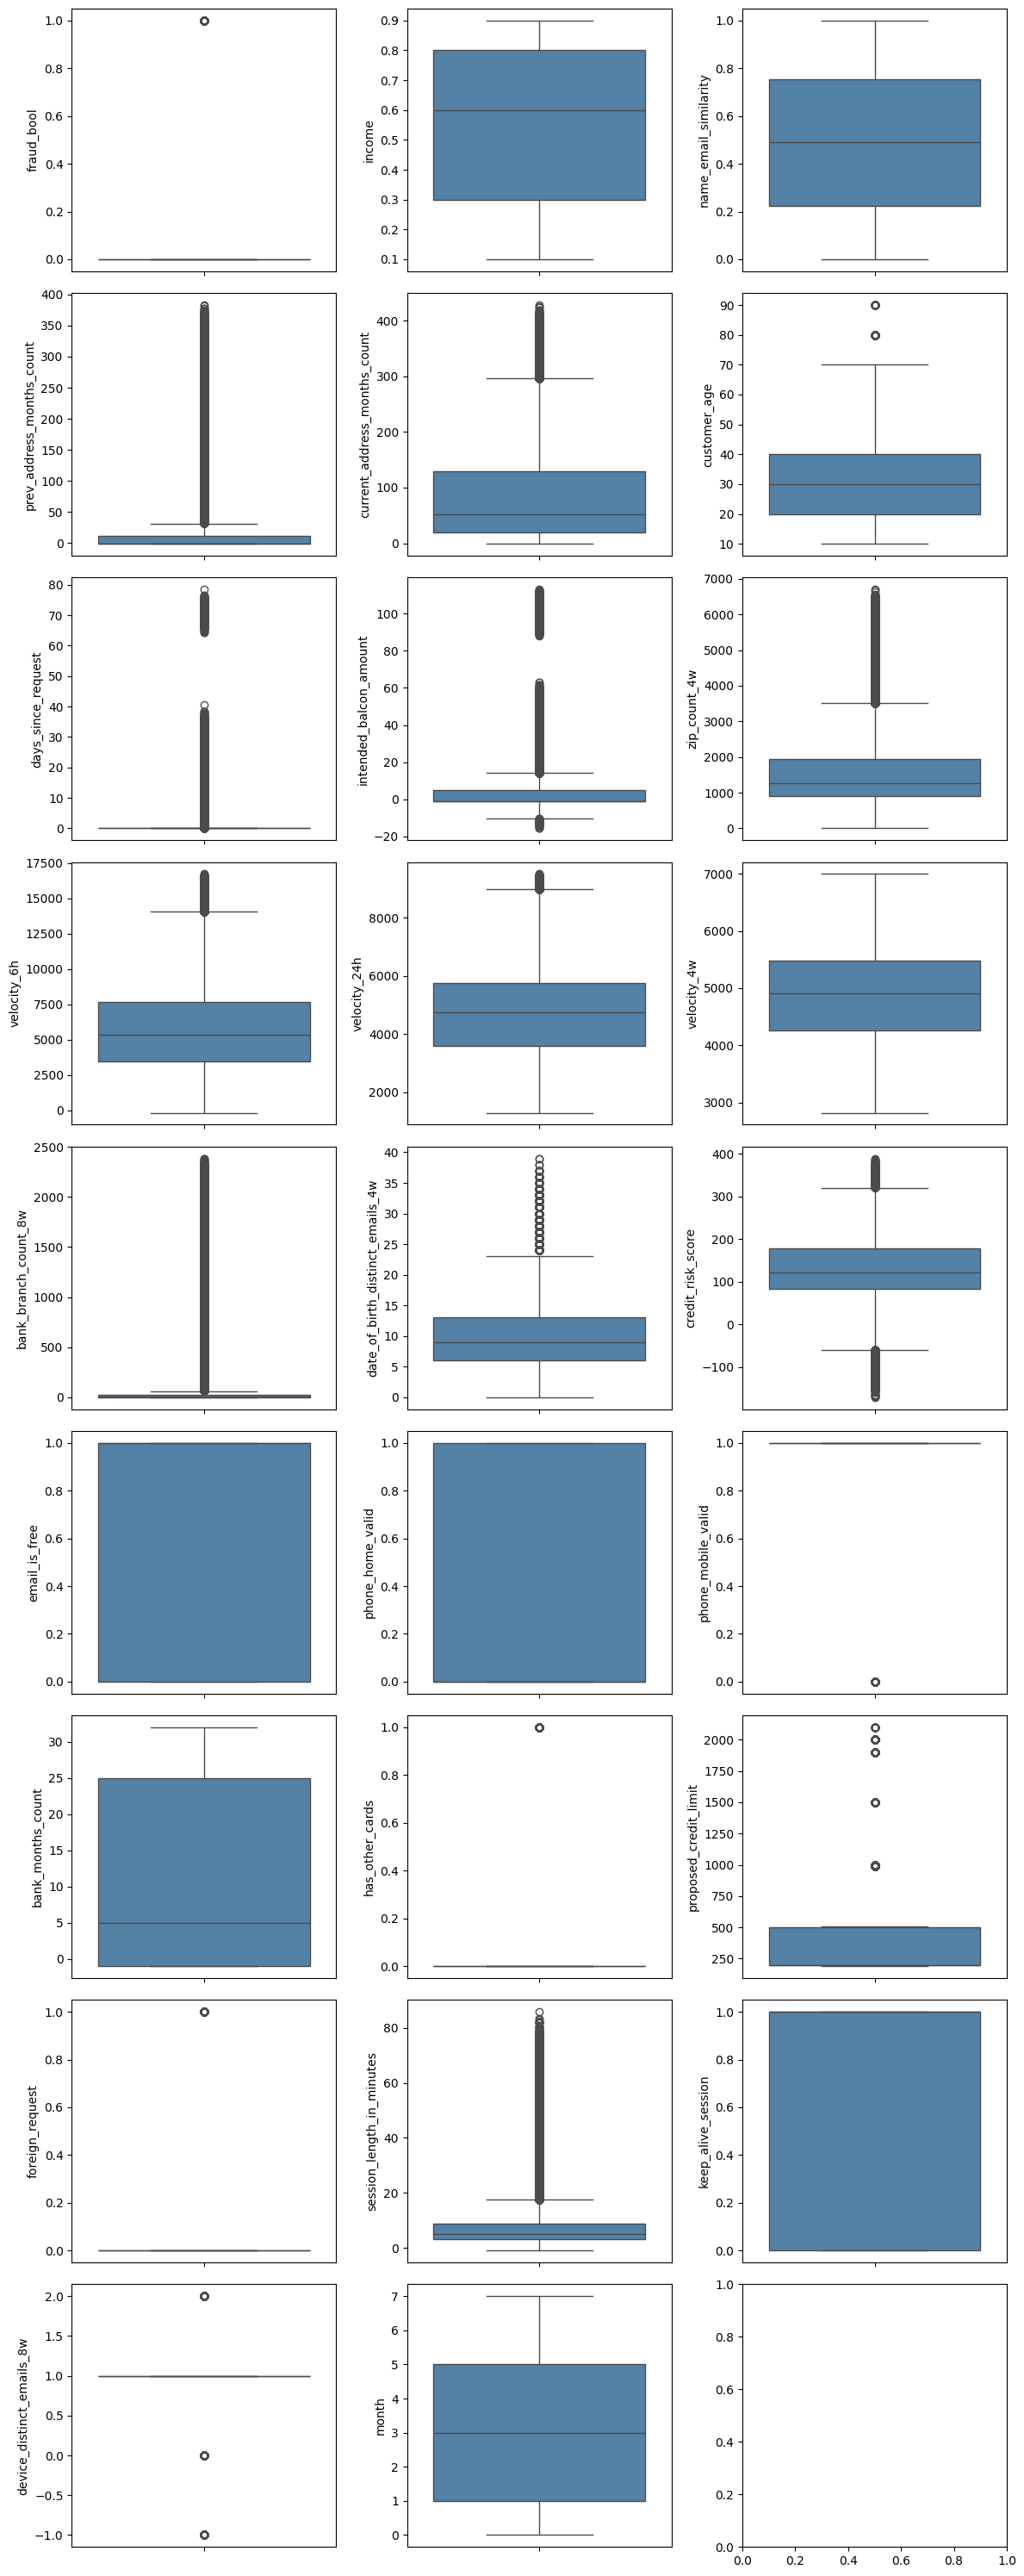

In [45]:
box_plot(data)

In [46]:
def plot_categorical_columns(df):

    categorical_columns = df.select_dtypes(include=['object']).columns
    num_columns = len(categorical_columns)
    # Divide el número de columnas por 2 para mostrar en 2 filas
    num_rows = 2
    num_cols = (num_columns // num_rows)+1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

    for i, column in enumerate(categorical_columns):
        row, col = divmod(i, num_cols)
        sns.countplot(x=column, data=df, ax=axes[row, col],color='salmon')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Recuento')
        axes[row, col].set_title(f'Recuento de {column}')
        
    
    plt.tight_layout()
    plt.show()

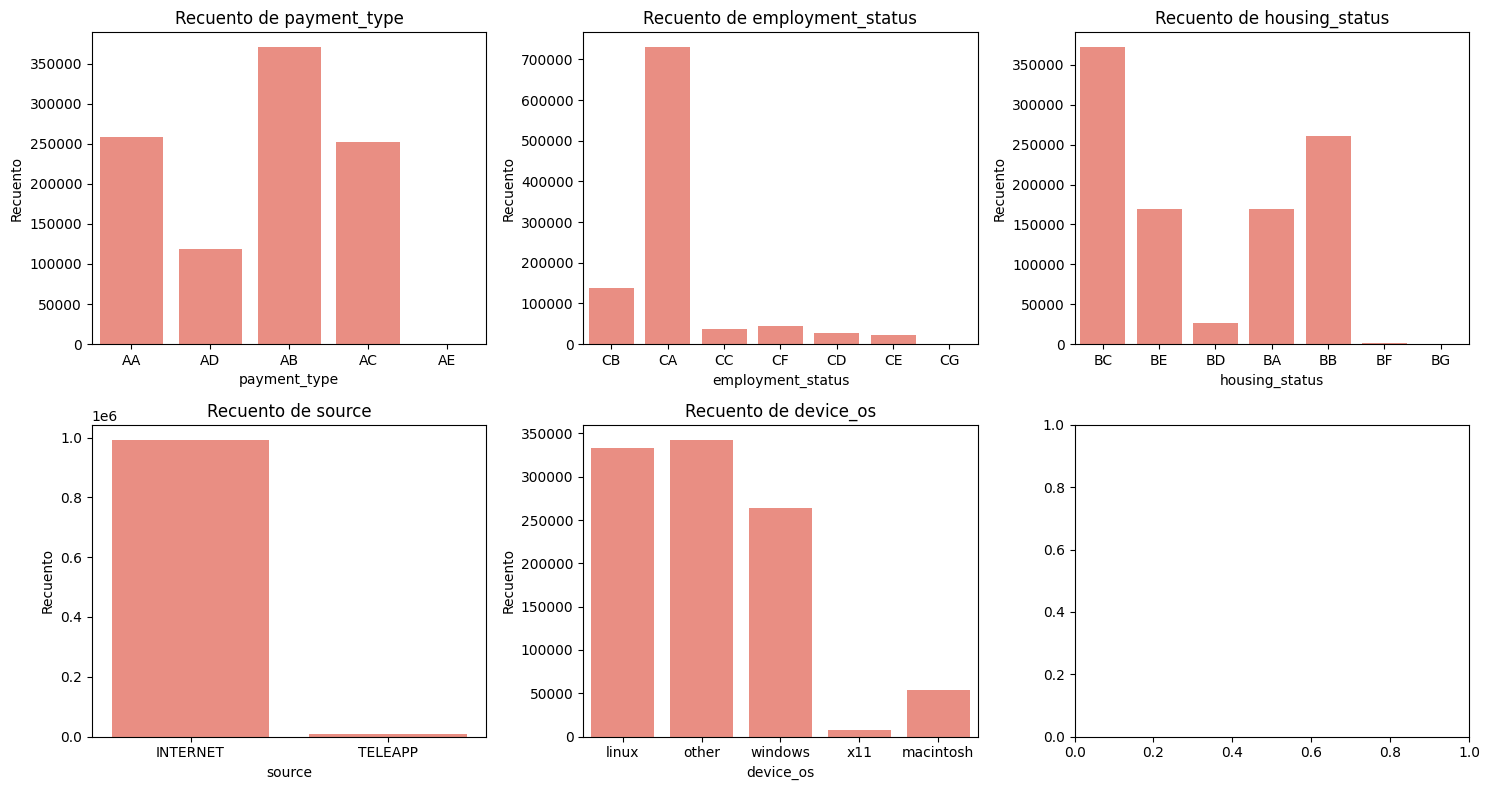

In [47]:
plot_categorical_columns(data)

In [48]:
a = data[data['fraud_bool']==1]
a

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
43,1,0.9,0.570800,-1,157,60,0.005908,35.337538,AA,4079,...,30,0,1500.0,0,INTERNET,4.036394,windows,1,1,0
140,1,0.1,0.993219,-1,67,20,0.015331,92.120139,AA,1192,...,25,0,1500.0,0,INTERNET,12.928072,windows,0,1,0
284,1,0.8,0.794351,-1,376,60,17.925951,41.422110,AA,815,...,28,0,1500.0,0,INTERNET,2.550167,linux,0,1,0
314,1,0.7,0.090000,-1,58,50,0.004134,-1.244047,AD,4011,...,27,0,1500.0,0,INTERNET,3.500856,windows,0,1,0
561,1,0.9,0.998248,31,45,30,0.010165,33.067538,AA,525,...,1,1,2000.0,0,INTERNET,44.536211,windows,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999862,1,0.3,0.346834,-1,13,20,0.007084,-0.994025,AC,692,...,-1,0,200.0,0,INTERNET,23.525141,windows,1,1,7
999879,1,0.7,0.161950,289,209,40,0.008195,-0.837462,AC,679,...,-1,0,2000.0,0,INTERNET,9.366778,windows,0,1,7
999923,1,0.4,0.098119,-1,139,30,0.028858,-1.383748,AB,345,...,1,0,500.0,0,INTERNET,2.363665,windows,0,1,7
999938,1,0.8,0.830047,-1,73,40,0.009757,-1.439571,AC,623,...,-1,0,1900.0,0,INTERNET,1.596140,linux,0,1,7


In [49]:
def plot_categorical_columns(df,a):

    categorical_columns = df.select_dtypes(include=['object']).columns
    num_rows = len(categorical_columns)
    num_cols = 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

    for i, column in enumerate(categorical_columns):
        sns.countplot(x=column, data=df, ax=axes[i, 0],color='salmon')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Recuento')
        axes[i, 0].set_title(f'Recuento de {column}')
        sns.countplot(x=column, data=a, ax=axes[i, 1],color='salmon')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Recuento')
        axes[i, 1].set_title(f'Recuento de los fraudes de {column}')

    plt.tight_layout()
    plt.show()

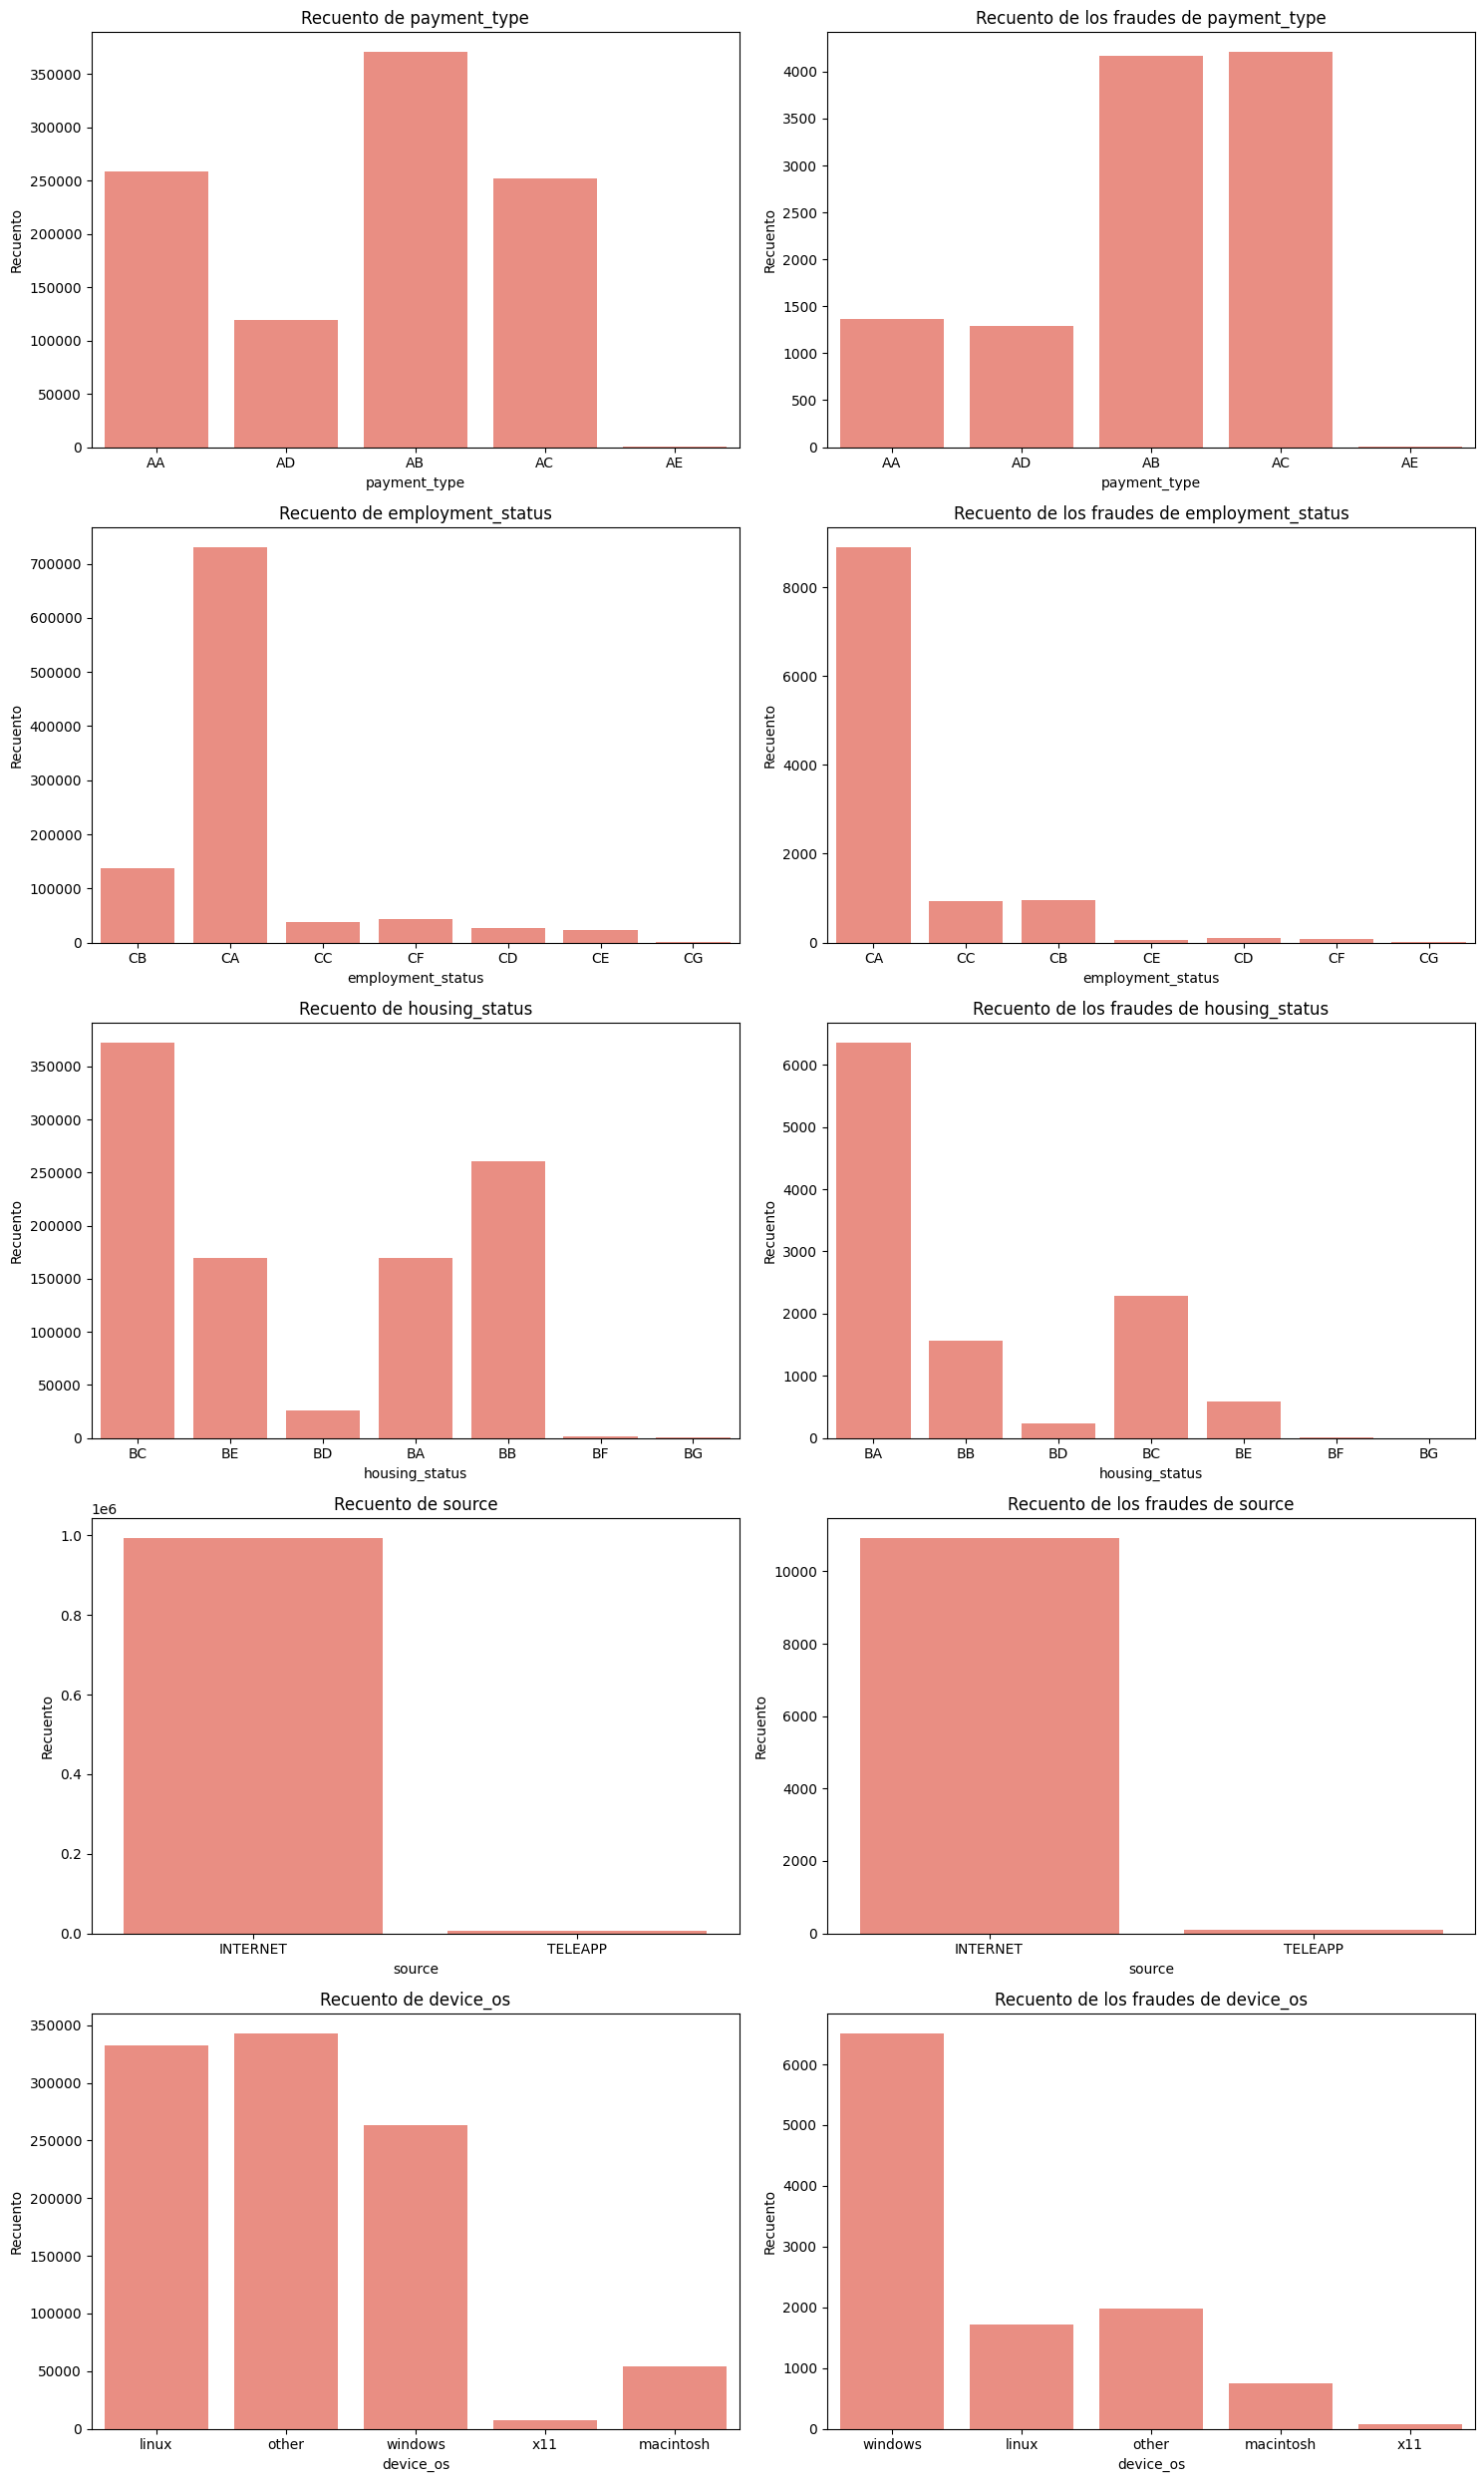

In [50]:
plot_categorical_columns(data,a)

In [51]:
lista_plot=[ 'customer_age', 'date_of_birth_distinct_emails_4w',
       'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'has_other_cards',
       'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w',
       'month']

In [52]:
def plot_discret_columns(df,a):
    
    num_rows = len(lista_plot)
    num_cols = 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

    for i, column in enumerate(lista_plot):
        sns.countplot(x=column, data=df, ax=axes[i, 0],color='salmon')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Recuento')
        axes[i, 0].set_title(f'Recuento de {column}')
        sns.countplot(x=column, data=a, ax=axes[i, 1],color='salmon')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Recuento')
        axes[i, 1].set_title(f'Recuento de los fraudes de {column}')

    plt.tight_layout()
    plt.show()

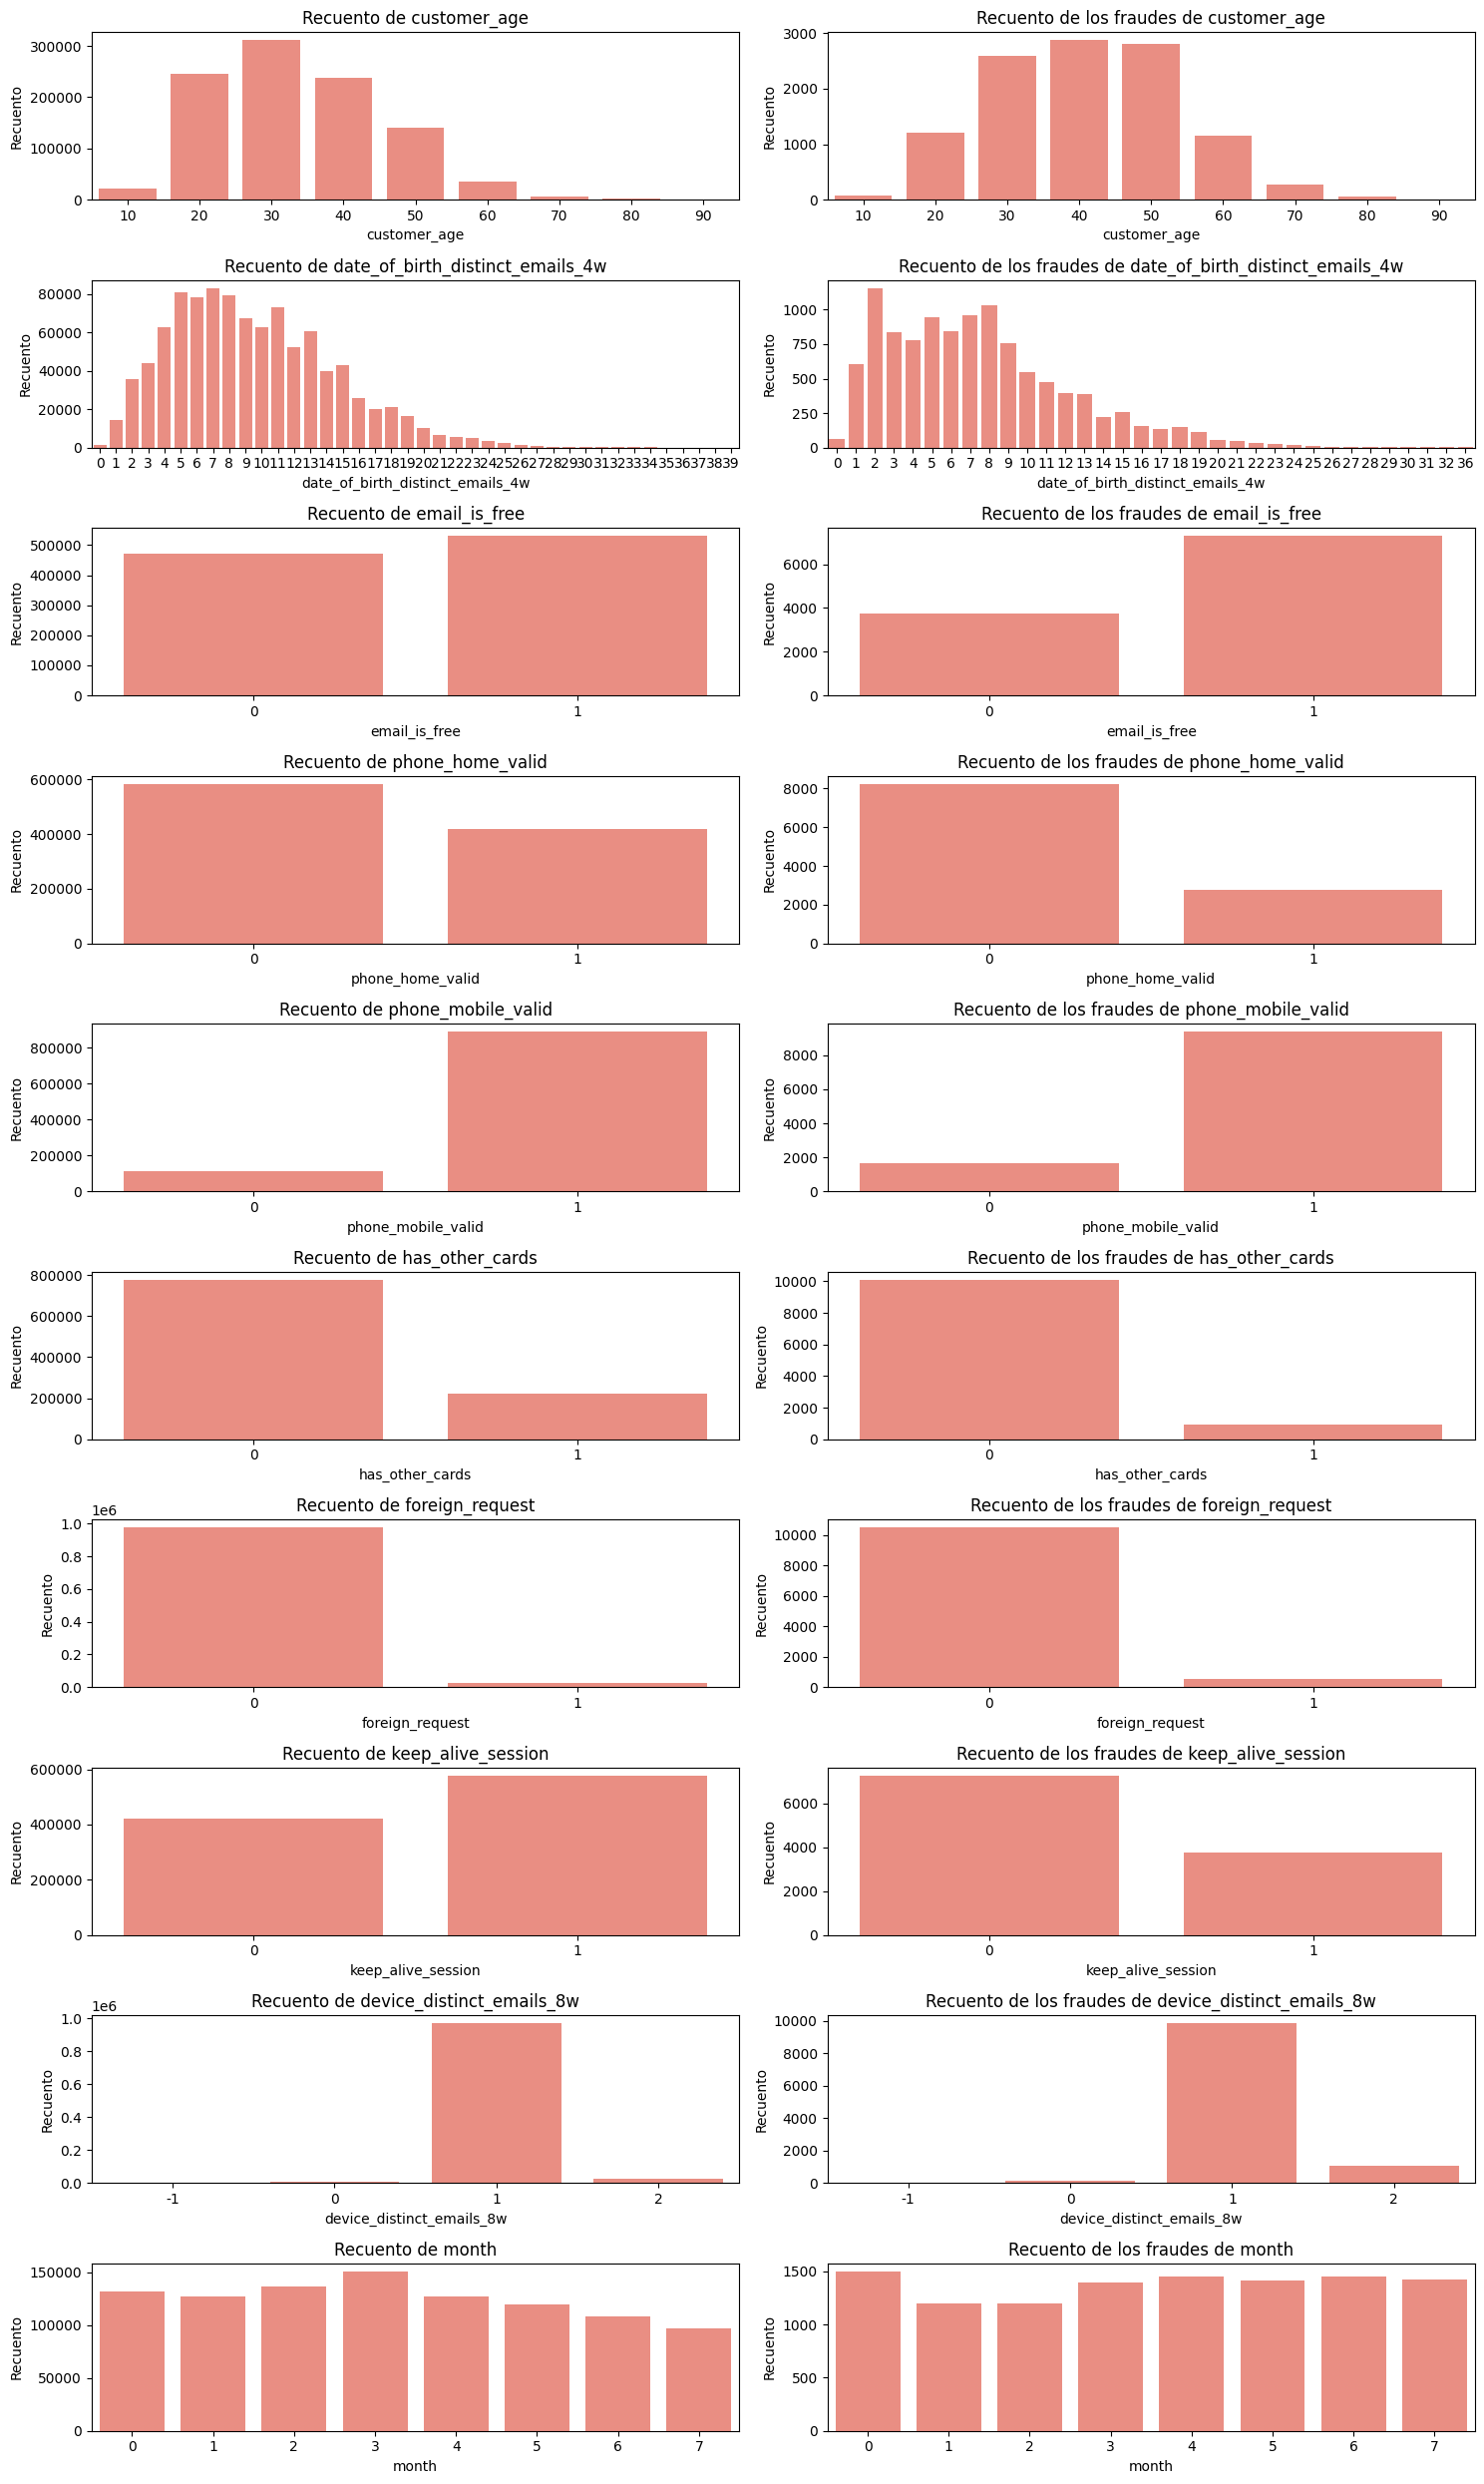

In [53]:
plot_discret_columns(data,a)

In [54]:
#Para ver la matriz de correlación vamos a quitar las variables tipo objeto
# Lista de columnas a eliminar
columnas_a_eliminar = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

# Creo un nuevo dataFrame con las columnas eliminadas
data_sin_object = data.drop(columns=columnas_a_eliminar)

# Verifico el DataFrame después de eliminar las columnas
data_sin_object.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,...,0,1,9,0,1500.0,0,16.224843,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,...,1,1,2,0,1500.0,0,3.363854,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,0,1,30,0,200.0,0,22.730559,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,0,1,1,0,200.0,0,15.215816,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,...,1,1,26,0,200.0,0,3.743048,0,1,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,1204,11556.955514,...,1,1,30,0,200.0,0,6.987316,1,1,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,1998,11723.993606,...,1,1,1,0,200.0,0,28.199923,1,1,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,1548,4999.555801,...,1,1,25,1,200.0,0,11.234264,1,1,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,1781,6979.994002,...,1,0,2,0,200.0,0,5.329387,1,1,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,3113,7549.992086,...,1,1,15,0,1500.0,0,4.103970,1,1,0


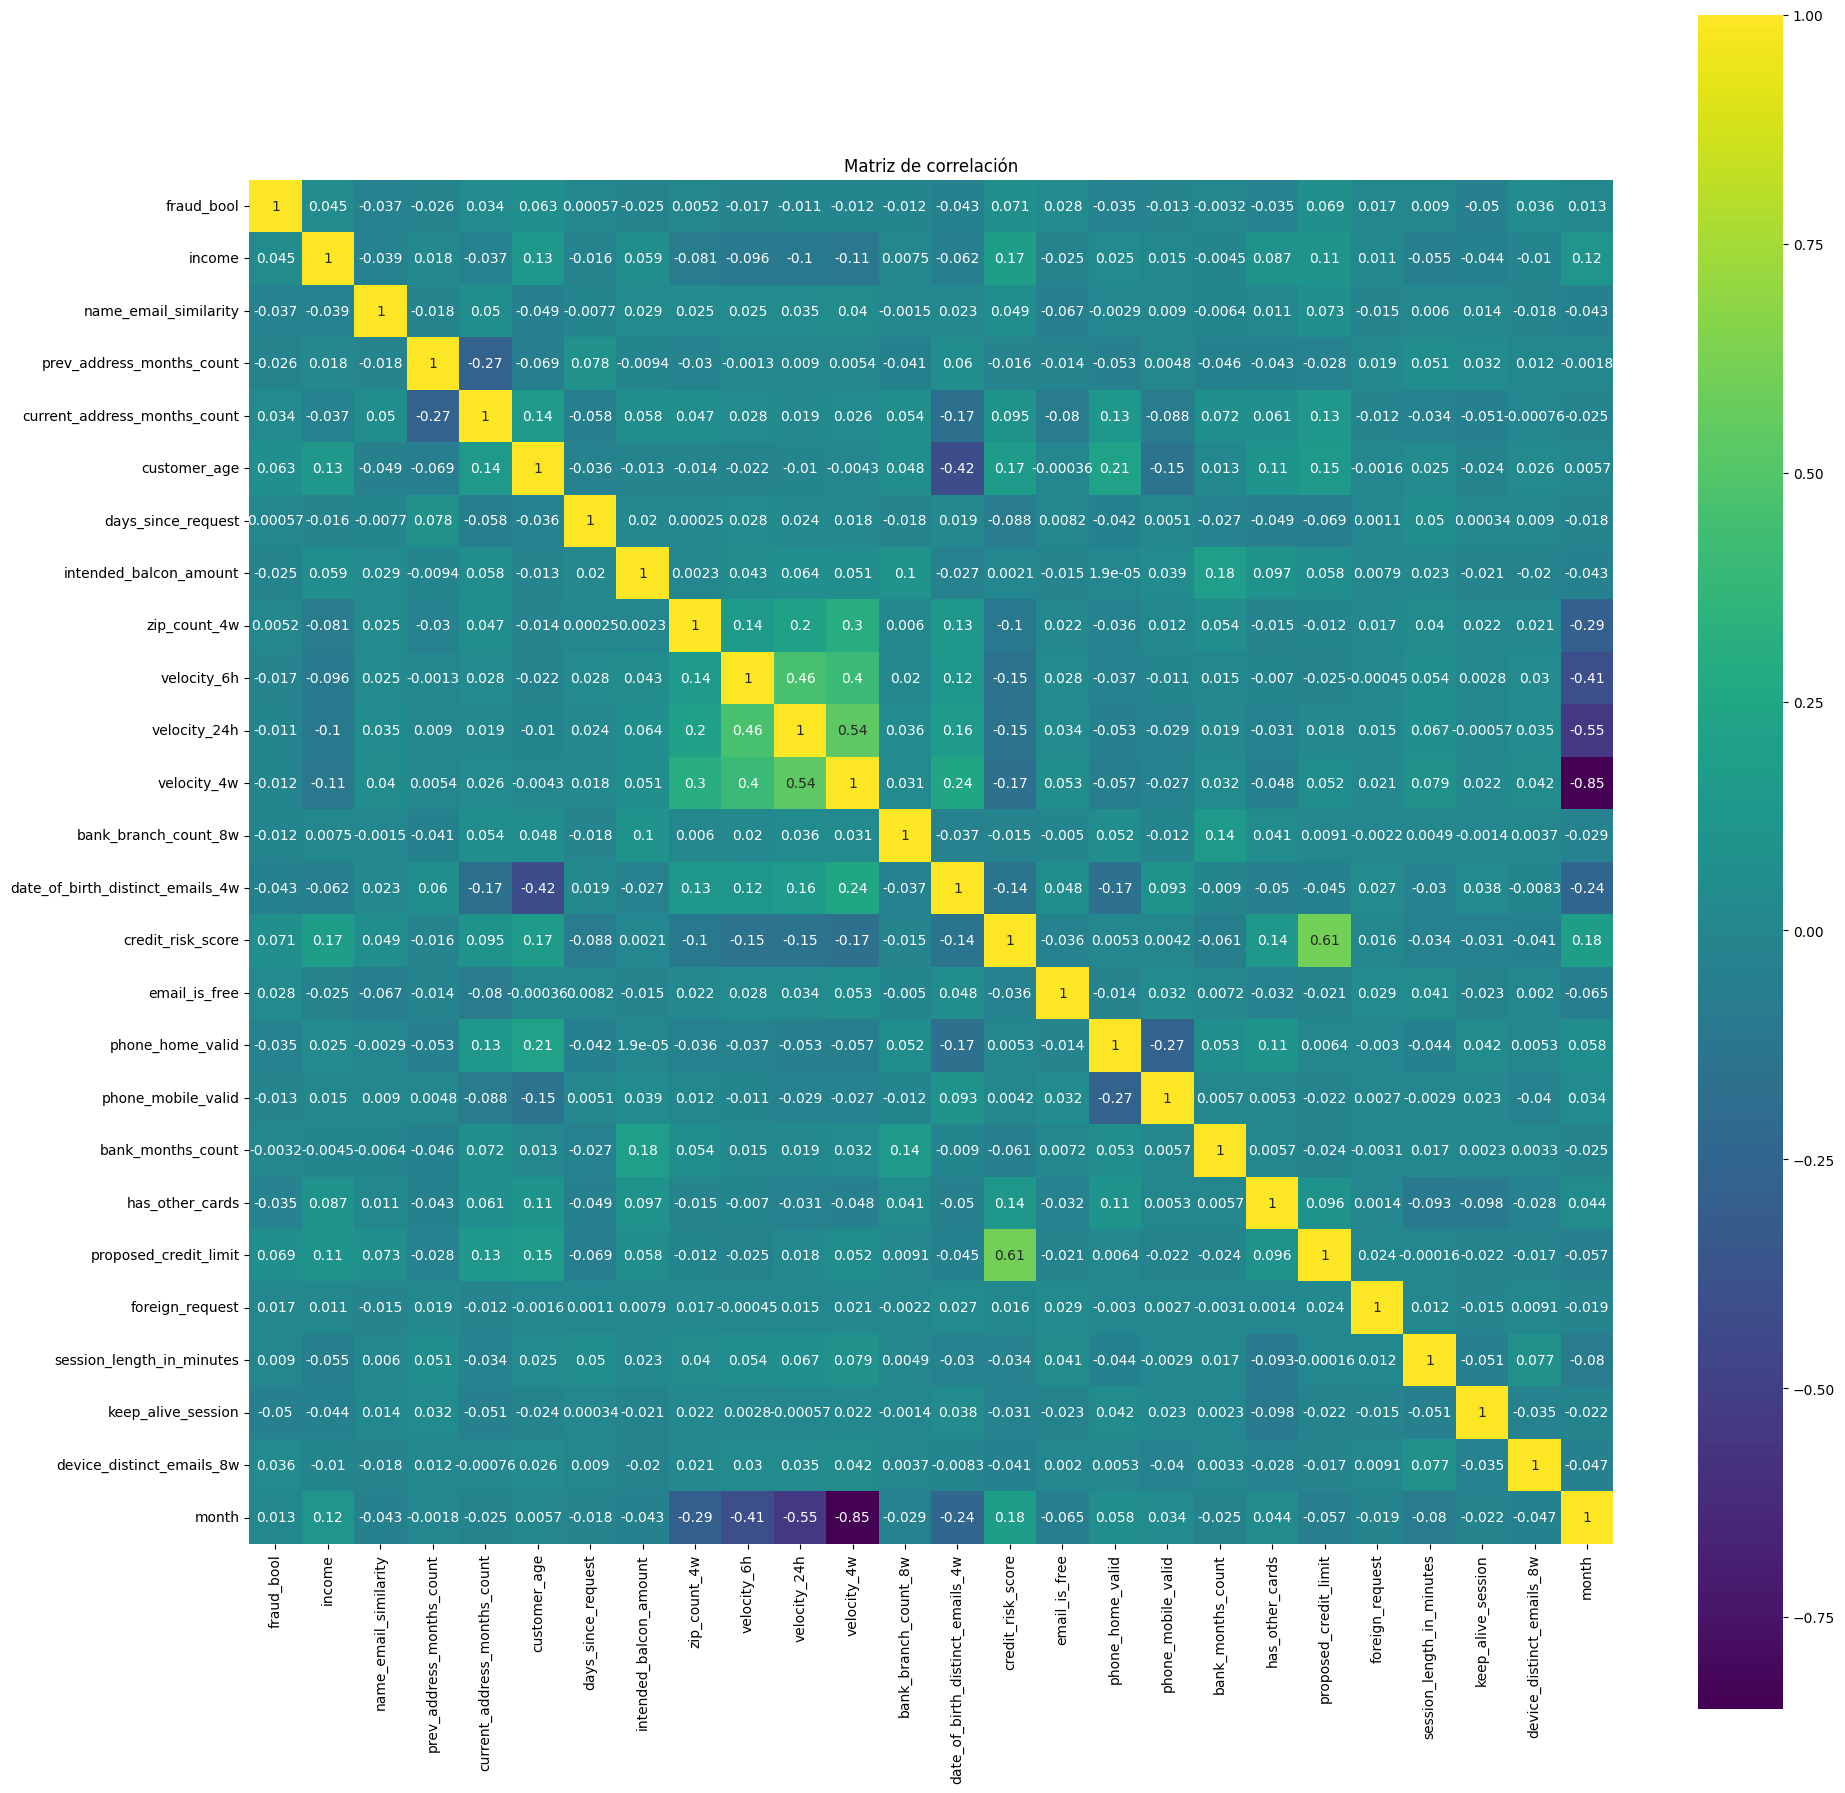

In [55]:
%matplotlib inline
#Matriz de corelacion matplotlib
correlation = data_sin_object.corr()
plt.figure(figsize=(22,22))
ax = sns.heatmap(correlation,vmin=-0.85, vmax=1,square=True,annot=True,cmap='viridis')
plt.title("Matriz de correlación")
plt.show()

In [56]:
#Podemos ver que sí y por lo tanto eliminamos la columna completa porque no es necesario para entrenar el modelo
data = data.drop(['velocity_4w'],axis=1)
data.shape

(1000000, 30)

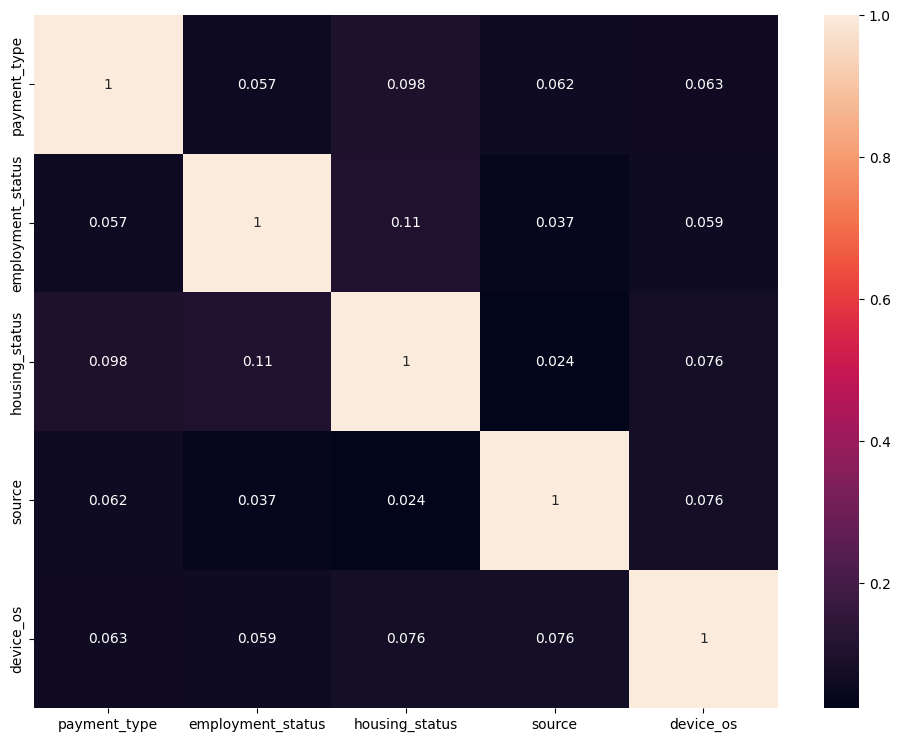

In [58]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

categorical_columns = data.select_dtypes(include=['object']).columns
cramers_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for i in categorical_columns:
    for j in categorical_columns:
        cramers_matrix.loc[i, j] = cramers_v(data[i], data[j])

plt.figure(figsize=(12, 9))
sns.heatmap(cramers_matrix.astype(float), annot=True)
plt.show()
